In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import hann
from scipy        import fftpack as fft
from scipy.signal import hann
from scipy.signal import chebwin
from scipy.signal import blackman
from scipy        import signal
from scipy.signal import butter
from scipy.signal import filtfilt

In [2]:
#FUNCION DE VENTANAS
def windows(s):
    N=s.shape[0]
    F  = fft.fft(s, axis=0)
    F  = 20* np.log(np.abs(F))

    w=hann(N)
    Fw= fft.fft(s*w)
    Fw=20*np.log10(np.abs(Fw))
    f  = np.linspace(0, 1000/2, N//2)
    plt.figure(figsize=(10,7))
    plt.subplot(3,1,1)
    plt.plot(f,F[0:N//2],color='black')
    plt.plot(f,Fw[0:N//2],color='red')
    plt.title("Señal con ventana: Hann") 
    plt.grid(True)


    #Ventana Cheb
    w1  = chebwin(N, 100)
    Fw1 = fft.fft(s*w1)
    Fw1 = 20* np.log(np.abs(Fw1))
    plt.figure(figsize = (10,7))
    plt.subplot(3,1,2)
    plt.plot(f,F[0:N//2],color='black')
    plt.plot(f, Fw1[0:N//2], color='red')
    plt.title("Señal con ventana: chebwin") 
    plt.grid(True)

    #Ventana Blackman
    w2  = blackman(N)
    Fw2 = fft.fft(SO2*w2)
    Fw2 = 20* np.log(np.abs(Fw2))
    plt.figure(figsize = (10,7))
    plt.subplot(3,1,2)
    plt.plot(f,F[0:N//2],color='black')
    plt.plot(f, Fw2[0:N//2], color='red')
    plt.title("Señal con ventana: blackman") 
    plt.grid(True)
    return ()



In [3]:
#PSD
def PSD (signal, l=1024, T=0.5, sr=1000):

    N=signal.shape[0]
    psd=[]

    i = 0;
    cont = 0;
    while cont <= N:
        ps=fft.fft(signal[i:i+l])
        psd.append(20*np.log(np.abs(ps)))
        i = i+int((1-T)*l)
        cont = i+l
    
    psd=np.array(psd[:-1])    
    psd = np.mean(psd,0)

    n = np.size(psd,0)//2

    plt.plot(np.linspace(0,sr/2,n), psd[0:n])
    plt.grid(True)
    return [psd[0:n]]
    

In [4]:
#FUNCION QUE EVALUA LA FUNCION DE TRANSFERENCIA DE UN FILTRO
def Respuesta(w,h): 
    w,h=signal.freqz(w, h)
    w.shape
    h.shape

    angles = np.unwrap(np.angle(h))

    plt.title('Digital filter frequency response')
    plt.plot(w, 20 * np.log10(abs(h)), 'b')
    plt.plot(w, angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.xlabel('Frecuencia [rad/muestra]')
    plt.grid(True)
    return ()

In [5]:
def m_movil_t (x, N=1024):
    y = []
    for i in range(len(x)//N):
        m = np.mean(x[i*N:i*N+N])
        y.append(x[i*N:i*N+N]-m)
    return (np.array(y).flatten())

In [6]:
def ten_lin (s, t, N=1024):
    y_fin = []
    for i in range(len(s)//N):
        x = []
        x.append(t[i*N:i*N+N])
        x.append(np.ones(len(t[i*N:i*N+N])))
        x = np.array(x).T
        
        y = []
        y.append(s[i*N:i*N+N])
        y = np.array(y).T
        
        w = np.dot(x.T,x)
        w = np.linalg.inv(w)
        w = np.dot(w, x.T)
        w = np.dot(w,y)
        
        yy = w[0]*t[i*N:i*N+N] + w[1]
        yy = s[i*N:i*N+N]-yy
        
        y_fin.append(yy)
        
    return (np.array(y_fin).flatten())

## Actividad II

### Ejercicio 1

In [7]:
path = '/home/omarpr/git/MCIB-19-P/eval/YJ/Data/'
fname = 'Med4.txt'

In [8]:
data = np.loadtxt(path+fname,delimiter='\t',dtype='str')

t=data[ : , 0]
SO2=data[:,1]
RESP=data[:,2]
EMG=data[:,3]
PUL=data[:,4]
ECG=data[:,5]

t    = t.astype('float')*60
SO2  = SO2.astype('float')
RESP = RESP.astype('float')
EMG  = EMG.astype('float')
PUL  = PUL.astype('float')
ECG  = ECG.astype('float')


###### IMPLEMENTACIÓN 
# Eleccion de la mejor ventana

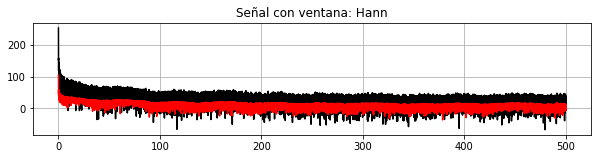

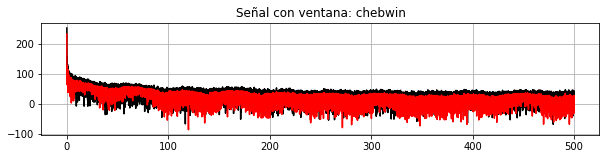

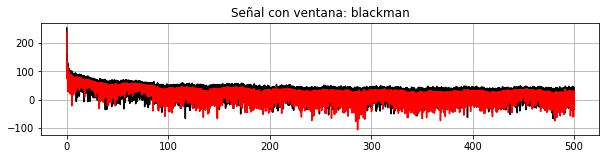

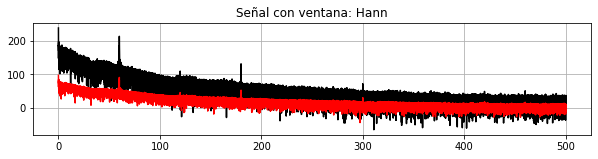

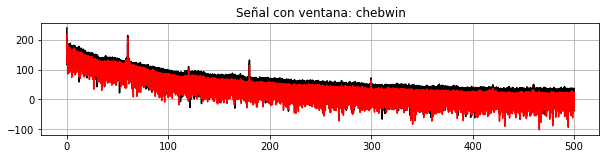

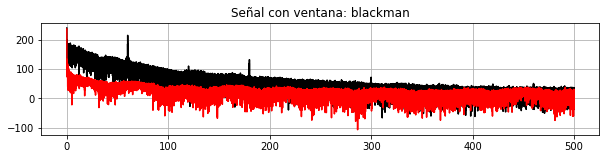

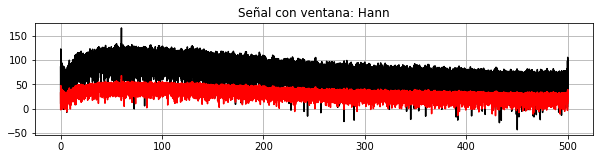

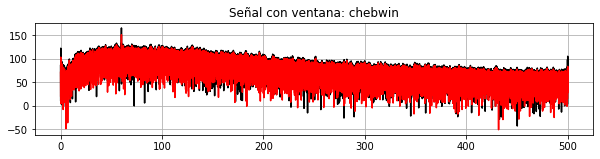

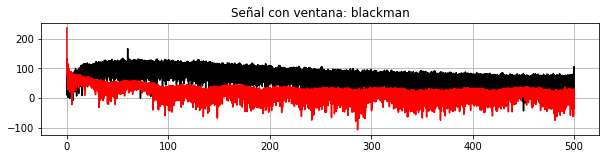

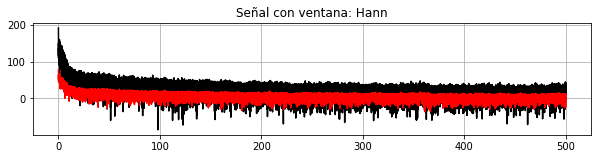

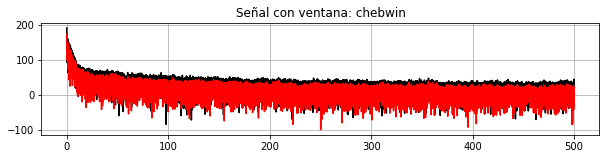

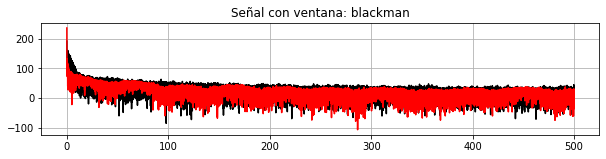

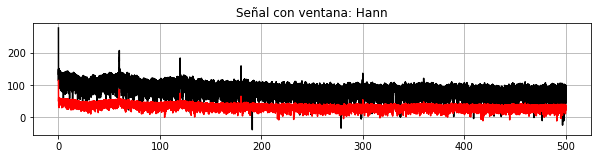

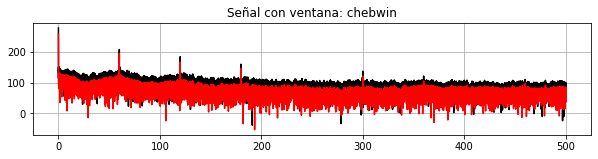

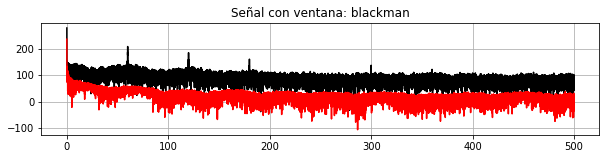

In [9]:


W1=windows(SO2)
W1=windows(ECG)
W1=windows(EMG)
W1=windows(PUL)
W1=windows(RESP)

In [10]:
path = '/home/omarpr/git/MCIB-19-P/eval/YJ/Data/'
fname = 'Lect1.txt'

In [11]:
data1 = np.loadtxt(path+fname,delimiter='\t',dtype='str')

t1=data1[:,0]
SO21=data1[:,1]
RESP1=data1[:,2]
EMG1=data1[:,3]
PUL1=data1[:,4]
ECG1=data1[:,5]

t1    = t1.astype('float')*60
SO21  = SO2.astype('float')
RESP1 = RESP.astype('float')
EMG1  = EMG.astype('float')
PUL1  = PUL.astype('float')
ECG1  = ECG.astype('float')


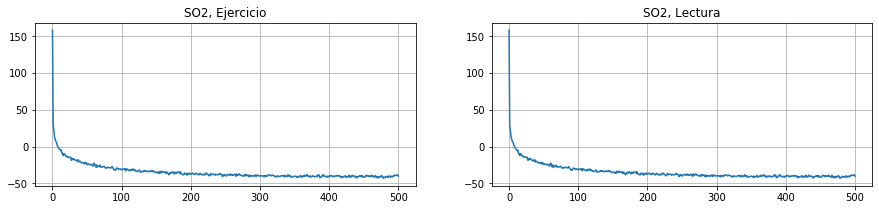

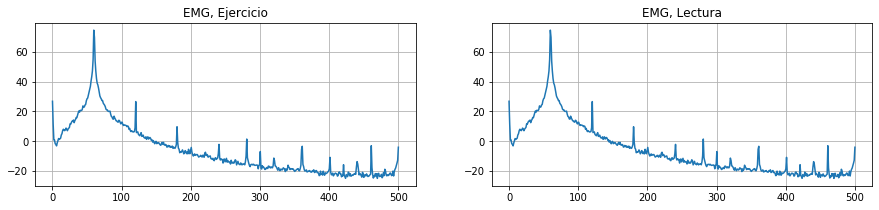

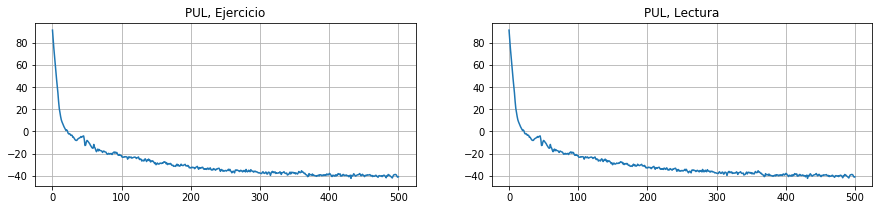

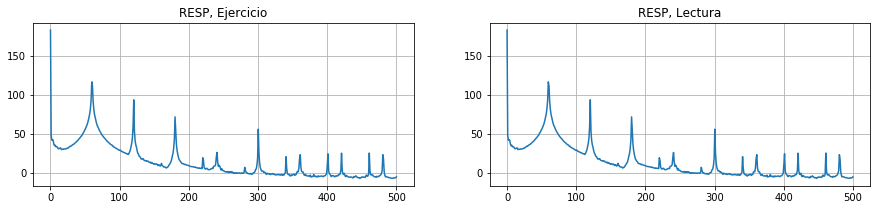

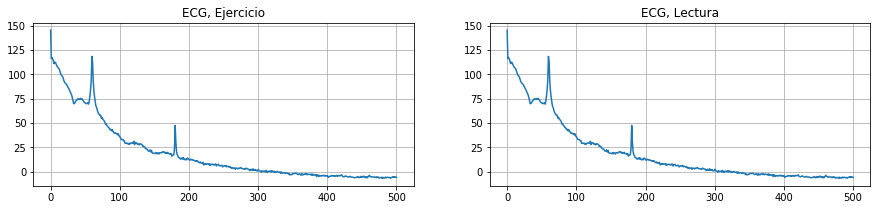

In [12]:
plt.figure(figsize = (15, 3)) 
plt.subplot(1,2,1)
plt.title("SO2, Ejercicio") 
PS1= PSD (SO2)
plt.subplot(1,2,2)
PS11= PSD (SO21)
plt.title("SO2, Lectura") 

plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
PS2= PSD (EMG)
plt.title("EMG, Ejercicio") 
plt.subplot(1,2,2)
PS21= PSD (EMG1)
plt.title("EMG, Lectura") 

plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
PS3= PSD (PUL)
plt.title("PUL, Ejercicio") 
plt.subplot(1,2,2)
PS31= PSD (PUL1)
plt.title("PUL, Lectura") 

plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
PS4= PSD (RESP)
plt.title("RESP, Ejercicio") 
plt.subplot(1,2,2)
PS41= PSD (RESP1)
plt.title("RESP, Lectura") 

plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
PS5= PSD (ECG)
plt.title("ECG, Ejercicio") 
plt.subplot(1,2,2)
PS51= PSD (ECG1)
plt.title("ECG, Lectura") 
plt.show()

### Ejercicio 2

# Nota

In [15]:
def filt_but(s, w, ord = 5):
    w = w/500 #esto calcula el doble de la frecuencia de corte 
    [b,a] =butter(ord, w, 'low')
    x = filtfilt(b, a, s)
    return (x,b,a)

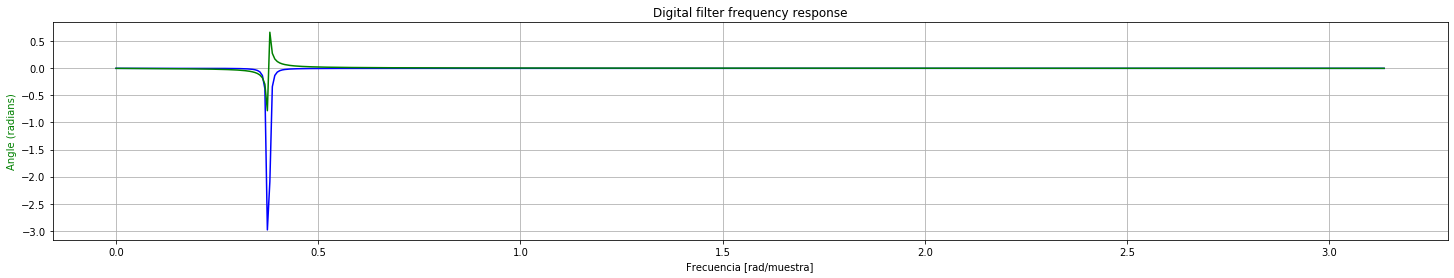

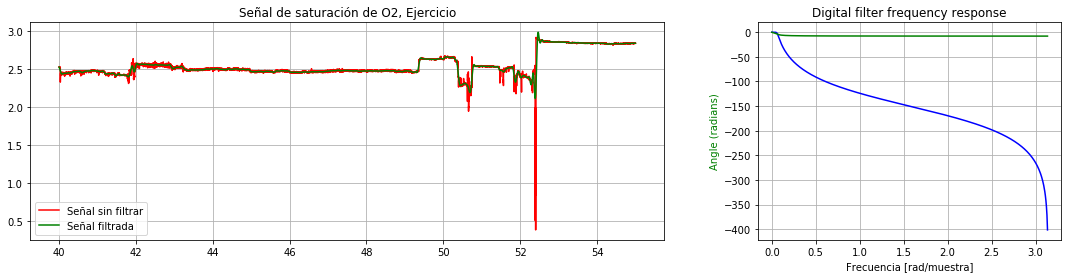

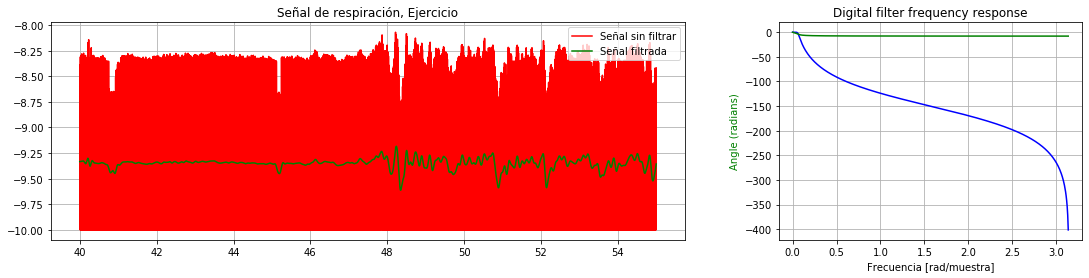

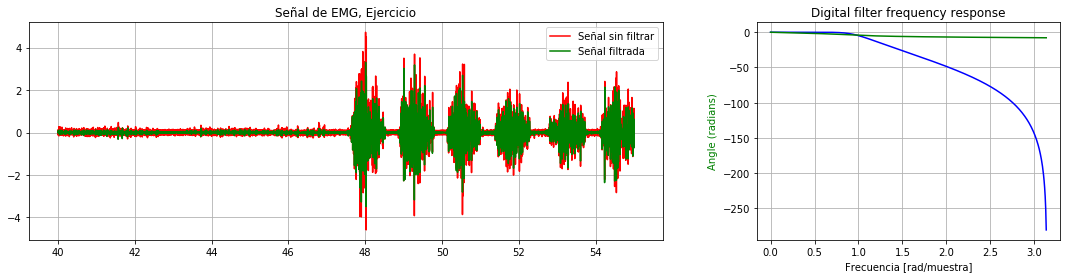

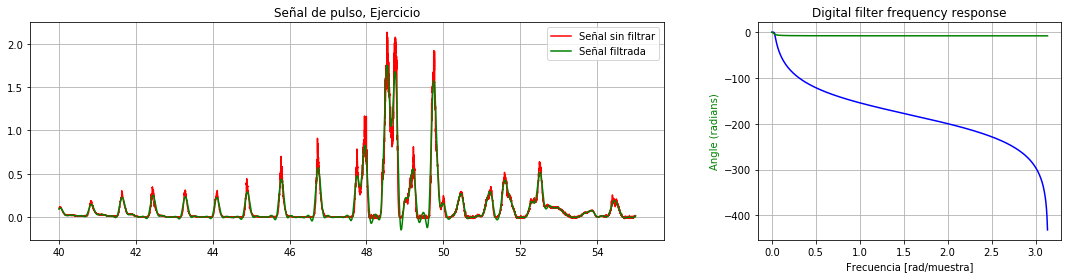

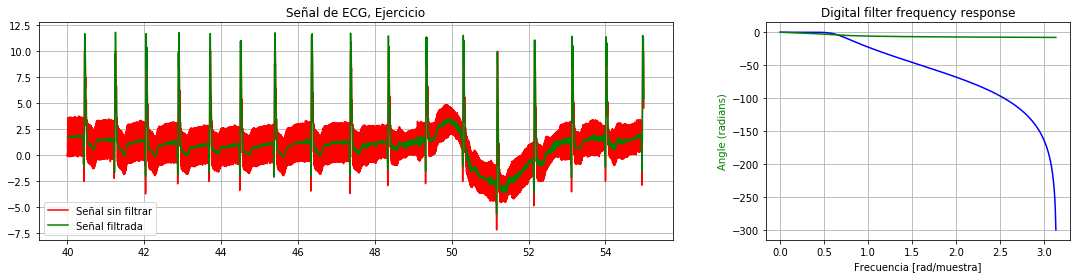

In [16]:
# Filtro notch para quitar el ruido de 60 Hz en algunas señales
[b_n, a_n] = signal.iirnotch(60.0, 70.0, 1000)
plt.figure(figsize = (25, 4))
Respuesta(b_n,a_n) 

#SO2
[SO2_f, b, a]= filt_but(SO2, 10)
plt.figure(figsize = (25, 4))
plt.subplot(1,2,1)
plt.plot(t[40000:55000], SO2[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], SO2_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de saturación de O2, Ejercicio") 
plt.grid(True)
plt.subplot(1,4,3)
Respuesta(b,a) 

#RESP
[RESP_f, b, a]= filt_but(RESP, 10)
plt.figure(figsize = (25, 4))
plt.subplot(1,2,1)
plt.plot(t[40000:55000], RESP[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], RESP_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de respiración, Ejercicio") 
plt.grid(True)
plt.subplot(1,4,3)
Respuesta(b,a) 

#EMG
EMG_n= filtfilt(b_n, a_n, EMG)
[EMG_f, b, a]= filt_but(EMG_n, 150)
plt.figure(figsize = (25, 4))
plt.subplot(1,2,1)
plt.plot(t[40000:55000], EMG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], EMG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de EMG, Ejercicio") 
plt.grid(True)
plt.subplot(1,4,3)
Respuesta(b,a) 

#PUL
[PUL_f, b, a]= filt_but(PUL, 5)
plt.figure(figsize = (25, 4))
plt.subplot(1,2,1)
plt.plot(t[40000:55000], PUL[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], PUL_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de pulso, Ejercicio") 
plt.grid(True)
plt.subplot(1,4,3)
Respuesta(b,a) 

#ECG
ECG_n= filtfilt(b_n, a_n, ECG)
[ECG_f, b, a]= filt_but(ECG_n, 100)
plt.figure(figsize = (25, 4))
plt.subplot(1,2,1)
plt.plot(t[40000:55000], ECG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], ECG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de ECG, Ejercicio") 
plt.grid(True)
plt.subplot(1,4,3)
Respuesta(b,a) 
plt.show()

### Ejercicio 3

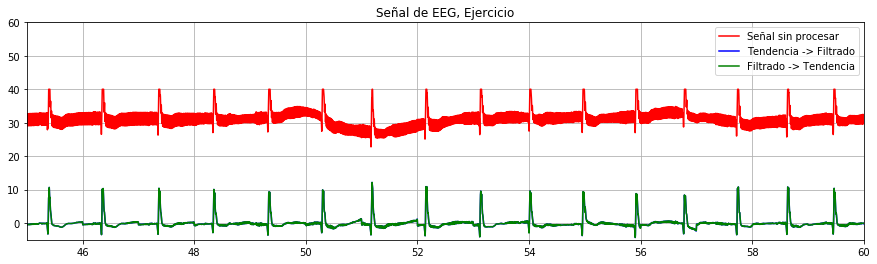

In [17]:
#Tendencia ---- Filtrado
from scipy import signal

ECG_ten = ten_lin (ECG, t,1000)
ECG_ten_n= filtfilt(b_n, a_n, ECG_ten)
[ECG_ten_fil, b, a]= filt_but(ECG_ten_n, 100)

# Filtrado ---- Tendencia
ECG_f_n= filtfilt(b_n, a_n, ECG)
[ECG_fil, b1, a1]= filt_but(ECG_f_n, 100)
ECG_fil_ten = ten_lin (ECG_fil, t,1000)

plt.figure(figsize = (15, 4))
plt.plot(t[45000:60000], ECG[45000:60000]+30,color = 'red', label="Señal sin procesar")
plt.plot(t[45000:60000], ECG_ten_fil[45000:60000],color = 'blue', label="Tendencia -> Filtrado")
plt.plot(t[45000:60000], ECG_fil_ten[45000:60000],color = 'green', label="Filtrado -> Tendencia")
plt.legend(loc='best')
plt.title("Señal de EEG, Ejercicio") 
plt.ylim(-5,60)
plt.xlim(45,60)
plt.grid(True)


